# **Introduction to Statistics in Python** 📊📈📉

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **🔴Dataset🔴**

In [2]:
url_happy = 'https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/05_Introduction%20to%20Statistics%20in%20Python/_dataset/world_happiness.csv'
url_food = 'https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/05_Introduction%20to%20Statistics%20in%20Python/_dataset/food_consumption.csv'
url_amir_deals = 'https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/05_Introduction%20to%20Statistics%20in%20Python/_dataset/amir_deals.csv'

In [3]:
# installing the pandas-profiling(-q ~ library installations will quite)
!pip install pandas-profiling -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 23.9 MB/s eta 0:00:00


## **1️⃣ Summary Statistics**



### **Descriptive and inferential statistics**

| Descriptive Statistics | Inferential Statistics |
| --- | --- |
| Describes and summarizes data | Draws conclusions about a population based on sample data |
| Deals with data from a sample | Deals with data from a population |
| Provides measures of central tendency, variability, and correlation | Provides hypothesis testing, confidence intervals, and significance tests |
| No generalization can be made beyond the data collected | Generalizes beyond the data collected |
| Used to identify patterns, trends, and relationships within the data | Used to make predictions and test hypotheses |
| Examples include mean, median, mode, range, variance, standard deviation, and correlation coefficients | Examples include t-tests, ANOVA, regression analysis, and chi-square tests |


### **Data type classification**

| Type of Variable | Description | Examples |
| --- | --- | --- |
| Numeric | Variables that represent numerical values | Age, height, weight |
| Discrete | Numeric variables that have specific, separate values | Number of children, number of pets |
| Continuous | Numeric variables that can take on any value within a range | Temperature, time |
| Categorical | Variables that represent categories or labels | Gender, eye color |
| Nominal | Categorical variables with no order or ranking | Hair color, marital status |
| Ordinal | Categorical variables with a natural order or ranking | Education level (e.g. high school, college, graduate school), survey responses (e.g. strongly agree, somewhat agree, neutral, somewhat disagree, strongly disagree) |


### **Food Consumption**

In [4]:
food_consumption =  pd.read_csv(url_food)

import pandas_profiling as pp
profile = pp.ProfileReport(food_consumption,
                           title="food_consumption_report",
                           html={'style': {"full-width": True}})
display(profile)

<ipython-input-4-880877f23fe4>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
food_consumption.head(5)

Unnamed: 0    country food_category  consumption  co2_emission
0           1  Argentina          pork        10.51         37.20
1           2  Argentina       poultry        38.66         41.53
2           3  Argentina          beef        55.48       1712.00
3           4  Argentina     lamb_goat         1.56         54.63
4           5  Argentina          fish         4.36          6.96

### **Mean and median**

In [6]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


In [7]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country']=='Belgium') | (food_consumption['country']=='USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


### **Mean vs. median**

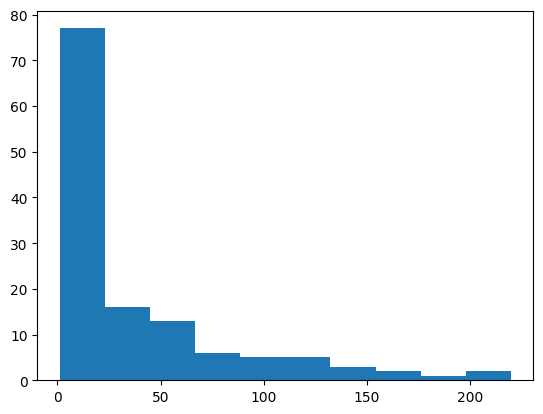

In [8]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()


>Take a look at the histogram we just created of different countries `CO2` emissions for rice. **Which of the following terms best describes the shape of the data**?

- Data is `Right-Skewed`

- `Left-skewed` means the data has a tail on the left side and is piled up higher on the right.

In [9]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption.groupby('food_category')['co2_emission'].agg([np.mean, np.median]))

                    mean  median
food_category                   
rice           37.591615    15.2


>Given the skew of this data, what measure of central tendency best summarizes the kilograms of CO2 emissions per person per year for rice?

The `mean` is substantially higher than the median since it's being pulled up by the high values over `100 kg/person/year`.

Possible answers

### **Measures of spread(`Quartiles`, `quantiles`, and `quintiles`)**

Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

In [10]:
q1, q2, q3 = np.quantile(food_consumption['co2_emission'], [0.25, 0.5, 0.75])
print("Q1: ", q1)
print("Q2: ", q2)
print("Q3: ", q3)

Q1:  5.21
Q2:  16.53
Q3:  62.597500000000004


In [11]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))

# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))

[   0.        5.21     16.53     62.5975 1712.    ]
[   0.       3.54    11.026   25.59    99.978 1712.   ]
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


### **Variance and standard deviation**

| Standard Deviation | Variance |
| --- | --- |
| A measure of how much the data deviates from the mean. | A measure of how spread out the data is. |
| Calculated by taking the square root of the variance. | Calculated by taking the average of the squared differences from the mean. |
| It is expressed in the same units as the data. | It is expressed in squared units of the data. |
| It is more commonly used than variance because it is easier to understand and interpret. | It is less commonly used than standard deviation because it is harder to understand and interpret. |
| It can be used to calculate the confidence interval for a population. | It cannot be used to calculate the confidence interval for a population directly. |
| It is sensitive to outliers. | It is sensitive to outliers. |


mean         std           var
food_category                                      
beef           374.102000  297.906710  88748.408132
dairy          179.153846  132.935669  17671.891985
eggs             7.499615    4.622966     21.371819
fish            27.601692   30.358481    921.637349
lamb_goat       91.056769  128.356996  16475.518363
nuts             7.323000    5.969895     35.639652
pork            57.070077   55.632396   3094.963537
poultry         22.793538   15.653332    245.026801
rice            37.591615   47.763754   2281.376243
soybeans         0.387308    0.938020      0.879882
wheat           13.644462    8.427570     71.023937

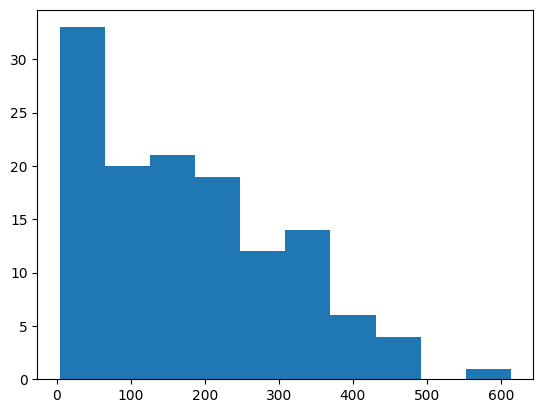

In [12]:
# Print variance and sd of co2_emission for each food_category
display(food_consumption.groupby('food_category')['co2_emission'].agg([np.mean, np.std, np.var]))

# Create histogram of co2_emission for food_category 'dairy'
plt.hist(food_consumption[food_consumption['food_category']== 'dairy']['co2_emission'])

# Show plot
plt.show()

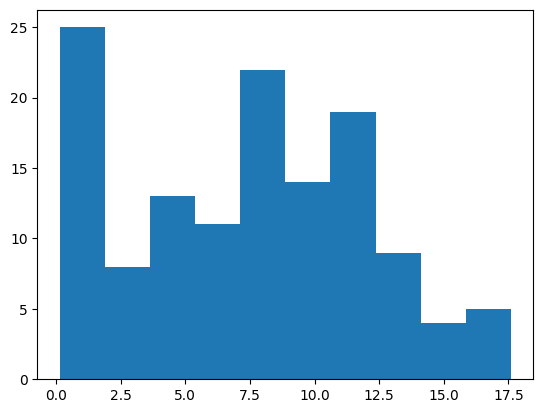

In [13]:
# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'])

# Show plot
plt.show()

### **Finding outliers using IQR**

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than or greater than , it's considered an outlier. In fact, this is how the lengths of the whiskers in a matplotlib box plot are calculated

![IQR](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)


In [14]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25) 
q3 = np.quantile(emissions_by_country, 0.75) 
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country > upper) | (emissions_by_country < lower)]
print(outliers)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64
country
Argentina    2172.4
Name: co2_emission, dtype: float64


## **2️⃣Random Numbers and Probability**

| Sampling Method        | Scenarios                                                    |
|------------------------|--------------------------------------------------------------|
| With Replacement       | Rolling a die twice                                          |
|                        | Flipping a coin 3 times                                      |
| Without Replacement    | Randomly selecting 5 products from the assembly line         |
|                        | From a deck of cards, dealing 3 players 7 cards each          |
|                        | Randomly picking 3 people to work on the weekend from a group of 20 people |


### **Calculating probabilities**

You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the `probability` of an event can be calculated by:
  
$$P(\text{event}) = \frac{\text{# ways event can happen}}{\text{total # of possible outcomes}}$$


In [39]:
amir_deals = pd.read_csv(url_amir_deals)
amir_deals.head(2)

Unnamed: 0    product   client status   amount  num_users
0           1  Product F  Current    Won  7389.52         19
1           2  Product C      New    Won  4493.01         43

In [67]:
import pandas_profiling as pp
profile = pp.ProfileReport(amir_deals,
                           title="amir_deals_report",
                           html={'style': {"full-width": True}})
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

# Calculate probability of picking a deal with each product
probs = counts / (amir_deals['product'].count())
print(probs)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


### **Sampling deals**

In [41]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace = True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11
     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


> **What type of sampling is better to use for this situation?**

- *Without replacement*

### **Creating a probability distribution**

A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. 

In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups DataFrame.

Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum.

#### **Instructions**

- Create a histogram of the group_size column of restaurant_groups, setting bins to [2, 3, 4, 5, 6]. Remember to show the plot.


- Count the number of each group_size in restaurant_groups, then divide by the number of rows in restaurant_groups to calculate the probability of randomly selecting a group of each size. Save as size_dist.


- Reset the index of size_dist.


- Rename the columns of size_dist to group_size and prob.


- Calculate the expected value of the size_distribution, which represents the expected group size, by multiplying the group_size by the prob and taking the sum.


- Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.


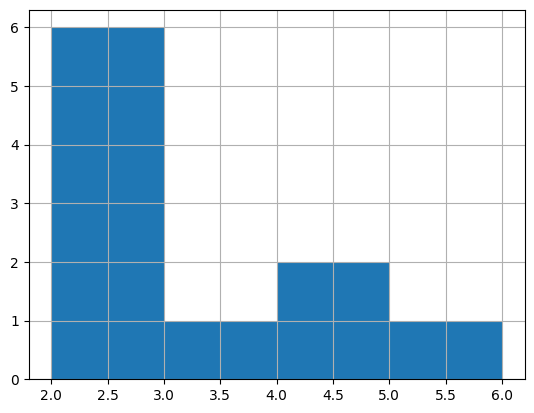

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1
2.9000000000000004
0.30000000000000004


In [42]:
data = {'group_id': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
        'group_size': [2, 4, 6, 2, 2, 2, 3, 2, 4, 2]}

restaurant_groups = pd.DataFrame(data)

# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins = [2, 3, 4, 5, 6]) 
plt.show()

# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups['group_size'].count()

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

# Calculate expected value
expected_value = (size_dist.group_size * size_dist.prob).sum()
print(expected_value)

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist.group_size >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more.prob.sum()
print(prob_4_or_more)

### **Expected value vs. sample mean**

**Expected value:**

- The theoretical average of a random variable or probability distribution.
- Calculated by summing the product of each possible value of the variable and its associated probability, then dividing by the total number of outcomes.
- Denoted by `E(X)` or `µ`, where `X` is the random variable.

**Sample mean:**

- The average value of a sample of observations drawn from a larger population.
- Calculated by summing the values of all observations in the sample and dividing by the number of observations.
- Used to estimate the population mean.

**Key differences:**

- Expected value is a theoretical concept, while sample mean is an observed value.
- Expected value is calculated based on the entire probability distribution, while sample mean is calculated based on a sample of observations.
- Expected value is constant for a given probability distribution, while sample mean varies depending on the particular sample drawn.
- Expected value is often used to make predictions or decisions about a population, while sample mean is used to estimate population parameters.

### **Which distribution?**

Situation                  | Distribution
---------------------------|----------------------
The outcome of rolling a 4-sided die | Discrete uniform
The ticket number of a raffle winner, assuming there is one ticket for each number from 1 to 100 | Discrete uniform
The time of day a baby will be born | Continuous uniform
The time you'll have to wait for a geyser to erupt if you show up at a random time, knowing that the geyser erupts exactly every 10 minutes | Continuous uniform
The height of a random person | Not uniform (likely normal distribution)

**Explanation:**

- The **discrete uniform distribution** models situations where there are a finite number of equally likely outcomes. Rolling a 4-sided die and choosing a raffle ticket from 1 to 100 are both examples of discrete uniform distributions.

- The **continuous uniform distribution** models situations where the outcome can take on any value within a given range, with all values being equally likely. The time of day a baby is born and the time you'll have to wait for a geyser to erupt are both examples of continuous uniform distributions.

- The height of a random person is unlikely to be uniformly distributed, as people's heights tend to cluster around certain values, with fewer individuals at extreme heights. Instead, height is more likely to be normally distributed, with most individuals having an average height and fewer individuals having heights that are much taller or shorter than average.


### **Data back-up**

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. **It is known, however, that back-ups happen exactly every 30 minutes.** Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.


In [43]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.16666666666666666
0.8333333333333334
0.3333333333333333


### **Simulating wait times**

To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

In the scipy.stats module, **the uniform class is used to represent a continuous uniform distribution**. The `rvs` method of the uniform class is used to generate random numbers from this distribution.

The syntax for using the `rvs` method is as follows:

```python
uniform.rvs(size=1, loc=0, scale=1)
```

- `size`: The number of random numbers to generate. Defaults to `1` if not specified.
- `loc`: The lower bound of the distribution. Defaults to `0` if not specified.
- `scale`: The range of the distribution (i.e., the upper bound minus the lower bound). Defaults to 1 if not specified.

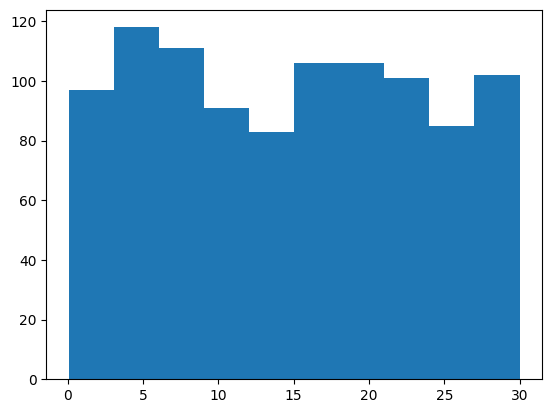

In [44]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(size=1000, loc=0, scale=30)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

 Unless Amir figures out exactly what time each backup happens, he won't be able to time his data entry so it gets backed up sooner, but it looks like he'll wait about 15 minutes on average.

### **The binomial distribution**

**Simulating sales deals**

Assume that Amir usually works on `3 deals per week`, and overall, he wins `30%` of deals he works on. Each deal has a binary outcome: it's either `lost`, or `won`, so you can model his sales deals with a binomial distribution.

In this exercise, we'll help Amir simulate a year's worth of his deals so he can better understand his performance.

In [45]:
import numpy as np
from scipy.stats import binom

# Set the random seed to ensure reproducibility
np.random.seed(10)

# Simulate a single deal
num_deals = 1
success_probability = 0.3
single_deal = binom.rvs(n=num_deals, p=success_probability, size=1)
print("Simulated outcome for a single deal:", single_deal)

# Simulate 1 week of 3 deals
num_deals_per_week = 3
week_deals = binom.rvs(n=num_deals_per_week, p=success_probability, size=1)
print("Simulated outcome for 1 week of 3 deals:", week_deals)

# Simulate 52 weeks of 3 deals
num_weeks = 52
deals = binom.rvs(n=num_deals_per_week, p=success_probability, size=num_weeks)

# Calculate and print the mean deals won per week
mean_deals_per_week = np.mean(deals)
print("Mean deals won per week over 52 weeks:", mean_deals_per_week)


Simulated outcome for a single deal: [1]
Simulated outcome for 1 week of 3 deals: [0]
Mean deals won per week over 52 weeks: 0.8461538461538461


### **Calculating binomial probabilities**

Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week.

In this exercise, we'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.

In [46]:
from scipy.stats import binom

num_successes = 3
total_trials = 3
success_probability = 0.3 # 30%

# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(num_successes, total_trials, success_probability)
print("Probability of closing 3 out of 3 deals:", prob_3)

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, total_trials, success_probability)
print("Probability of closing <= 1 deal out of 3 deals:", prob_less_than_or_equal_1)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, total_trials, success_probability)
print("Probability of closing > 1 deal out of 3 deals:", prob_greater_than_1)


Probability of closing 3 out of 3 deals: 0.026999999999999996
Probability of closing <= 1 deal out of 3 deals: 0.784
Probability of closing > 1 deal out of 3 deals: 0.21599999999999997


Amir has about a $\textbf{22%}$ chance of closing more than one deal in a week.

### **How many sales will be won?**
Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall from the video that the expected value of a binomial distribution can be calculated by 
$n \times p$.

In [47]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.30
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


If Amir's win rate goes up by $\textbf{5%}$, he can expect to close more than 1 deal on average each week

## **3️⃣More Distributions and the Central Limit Theorem**

### **Amir Deals**

In [48]:
amir_deals =  pd.read_csv(url_amir_deals)

import pandas_profiling as pp
profile = pp.ProfileReport(amir_deals,
                           title="amir_deals_report",
                           html={'style': {"full-width": True}})
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
amir_deals.head(5)

Unnamed: 0    product   client status   amount  num_users
0           1  Product F  Current    Won  7389.52         19
1           2  Product C      New    Won  4493.01         43
2           3  Product B      New    Won  5738.09         87
3           4  Product I  Current    Won  2591.24         83
4           5  Product E  Current    Won  6622.97         17

### **Normal Distribution**

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals As part of Amir's performance review, we want to be able to estimate the probability of him selling different amounts, but before we can do this, you'll need to determine what kind of distribution the amount variable follows.

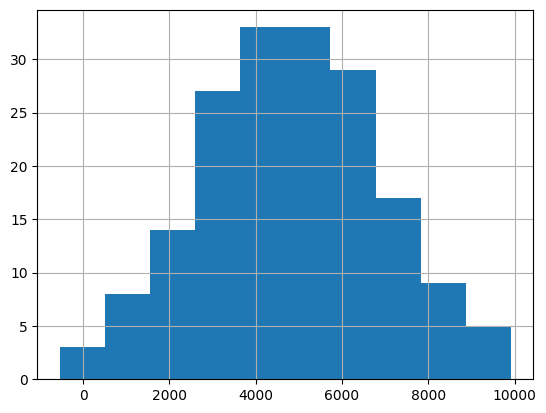

In [50]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins = 10)
plt.show()

### **Probabilities from the normal distribution**

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the `amount` column of `amir_deals` and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.


In [51]:
from scipy.stats import norm

# Define the parameters for the distribution
mean = 5000
std_dev = 2000

# Calculate the probability of a deal being less than 7500
probability_less_7500 = norm.cdf(7500, mean, std_dev)
print("Probability of deal < 7500:", probability_less_7500)

# Calculate the probability of a deal being greater than 1000
probability_over_1000 = 1 - norm.cdf(1000, mean, std_dev)
print("Probability of deal > 1000:", probability_over_1000)

# Calculate the probability of a deal being between 3000 and 7000
probability_3000_to_7000 = norm.cdf(7000, mean, std_dev) - norm.cdf(3000, mean, std_dev)
print("Probability of deal between 3000 and 7000:", probability_3000_to_7000)

# Calculate the deal amount at which 25% of deals will be less than
percentile_25 = norm.ppf(0.25, mean, std_dev)
print("Deal amount at 25th percentile:", percentile_25) 

Probability of deal < 7500: 0.8943502263331446
Probability of deal > 1000: 0.9772498680518208
Probability of deal between 3000 and 7000: 0.6826894921370859
Deal amount at 25th percentile: 3651.0204996078364


### **Simulating sales under new market conditions**

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by `20%` and the volatility, or standard deviation, of each sale's worth will increase by `30%`. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the new_sales DataFrame, which has already been created for you.

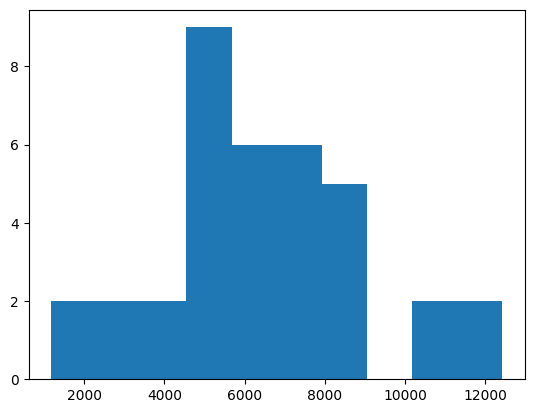

In [52]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size = 36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

Although the average sale amount went up, the variation also increased, so it's not straightforward to decide whether these sales are better than his current ones. In the next exercise, you'll explore the effects of higher variation.

### **The central limit theorem**

> The **Central Limit Theorem** states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the `num_users` column of `amir_deals` more closely, which contains the number of people who intend to use the product Amir is selling.

**Note:** The `replace=True` argument in the `sample()` function tells Pandas to allow the same row to be selected more than once. This is useful if you want to ensure that you have a representative sample of the data, even if some rows are more common than others.

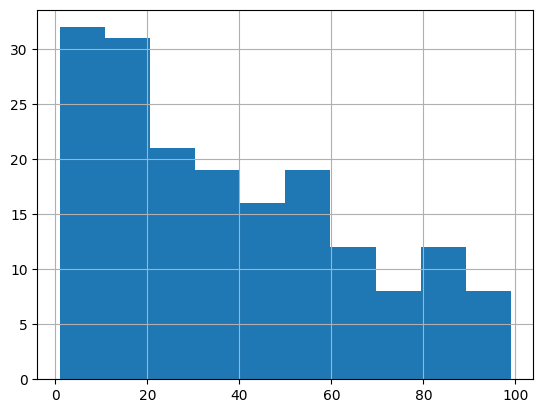

32.0


In [53]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace= True)

# Take mean of samp_20
print(np.mean(samp_20))

[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1]


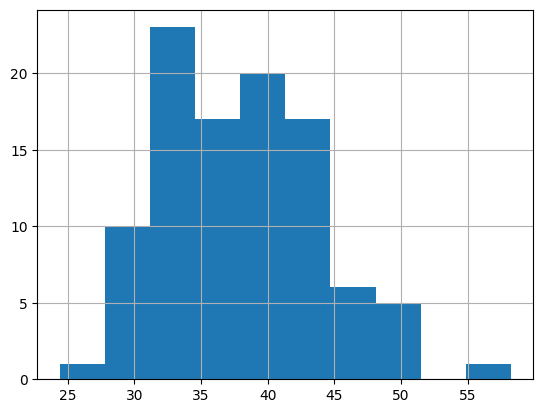

In [54]:
sample_means = []

# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace = True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
print(sample_means)

# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

### **The mean of means**

You want to know what the average number of users (num_users) is per deal, but you want to know this number for the entire company so that you can see if Amir's deals have more or fewer users than the company's average deal. The problem is that over the past year, the company has worked on more than ten thousand deals, so it's not realistic to compile all the data. Instead, you'll estimate the mean by taking several random samples of deals, since this is much easier than collecting data from everyone in the company.

In [55]:
# Set seed to 321
np.random.seed(321)

sample_means = []

# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = amir_deals['num_users'].sample(20, replace = True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))

38.821666666666665
37.651685393258425


### **The Poisson distribution**

The Poisson distribution is a probability distribution that helps us model and understand the number of rare events that occur within a fixed interval of time or space. It is often used when we want to estimate the likelihood of a specific number of events happening when those events occur randomly and independently at a constant average rate.

**Key points about the Poisson distribution:**

- **Rare events:** The distribution is suitable for situations where the events of interest are rare, meaning they occur infrequently within the given interval.

- **Fixed interval:** We consider a specific fixed interval, such as a time period or a defined space, within which we observe the occurrence of events.

- **Constant average rate:** The events are assumed to happen at a constant average rate throughout the interval. This rate is denoted by λ (lambda), which represents the average number of events occurring per unit interval.

- **Independence:** Each event is assumed to occur independently of others, meaning the occurrence of one event does not affect the probability of other events occurring.


The Poisson distribution is commonly used to model events that occur randomly and independently over a fixed interval, such as the number of phone calls received at a call center in a given hour, the number of cars passing through a toll booth in a minute, or the number of emails received per day. The distribution assumes that the events are rare and occur with a constant average rate.

The probability mass function (PMF) of the Poisson distribution is given by the formula:

$$P(X = k) = \frac{{\lambda^k \cdot e^{-\lambda}}}{{k!}}$$


Where:

- $P(X = k)$ is the probability that the random variable X takes on the value k.
- `λ` (lambda) is the average rate or intensity of the events occurring in the interval.
- `e` is the base of the natural logarithm (approximately 2.71828).
- `k!` (`k` factorial) is the factorial of k, which is the product of all positive integers less than or equal to k.

The mean (`μ`) and variance ($σ^2$) of a Poisson distribution are both equal to λ.

Some important properties of the Poisson distribution are:

The events occur independently of each other.
The average rate of events is constant throughout the interval.
The probability of multiple events occurring at the same time is negligible.
The distribution is right-skewed, with its peak located around the mean.
The Poisson distribution has applications in various fields, including physics, biology, telecommunications, and finance. It provides a useful approximation for rare events when the number of trials is large and the probability of success is small.

### **Tracking lead responses**

Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, we'll calculate probabilities of Amir responding to different numbers of leads.

| Function | Purpose | Input Parameters | Output |
|----------|---------|-----------------|--------|
| `poisson.pmf(k, lambda)` | Probability Mass Function | `k`: Number of events <br> `lambda`: Average rate of events | Probability of observing exactly `k` events |
| `poisson.cdf(k, lambda)` | Cumulative Distribution Function | `k`: Number of events <br> `lambda`: Average rate of events | Cumulative probability of observing up to `k` events |


In [56]:
# Import the necessary module from scipy.stats
from scipy.stats import poisson

# Calculate the probability of getting 5 responses when the average is 4
prob_5 = poisson.pmf(5, 4)
print("Probability of 5 responses:", prob_5)

# Calculate the probability of a coworker getting 5 responses when the average is 5.5
prob_coworker = poisson.pmf(5, 5.5)
print("Probability of a coworker getting 5 responses:", prob_coworker)

# Calculate the probability of getting 2 or fewer responses when the average is 4
prob_2_or_less = poisson.cdf(2, 4)
print("Probability of 2 or fewer responses:", prob_2_or_less)

# Calculate the probability of getting more than 10 responses when the average is 4
prob_over_10 = 1 - poisson.cdf(10, 4)
print("Probability of more than 10 responses:", prob_over_10)


Probability of 5 responses: 0.1562934518505317
Probability of a coworker getting 5 responses: 0.17140068409793663
Probability of 2 or fewer responses: 0.23810330555354436
Probability of more than 10 responses: 0.0028397661205137315


**Note:** if we provide `poisson.pmf()` or `poisson.cdf()` with a non-integer, it throws an error since the Poisson distribution only applies to integers.

**Distribution**


| Distribution  | Situation                                                     |
|--------------|-------------------------------------------------------------|
| Poisson      | Number of products sold each week.                           |
| Poisson      | Number of customers that enter a store each hour.            |
| Exponential  | Amount of time until someone pays off their loan.            |
| Exponential  | Amount of time until the next customer makes a purchase.     |
| Binomial     | Number of people from a group of 30 that pass their driving test. |
| Normal       | Heights of a group of people.                                |
| Normal       | Weights of a group of people.                                |
| Uniform      | Time it takes to complete a task within a given range.        |
| Uniform      | Randomly selected numbers between 1 and 10.                  |
| Bernoulli    | Outcome of a coin toss (e.g., heads or tails).                |


### **Distribution dragging and dropping**

By this point, you've learned about so many different probability distributions that it can be difficult to remember which is which. In this exercise, you'll practice distinguishing between distributions and identifying the distribution that best matches different scenarios.

#### `Instructions`

- Match each situation to the distribution that best models it.

#### `Poisson`

- Number of products sold each week.


- Number of customers that enter s store each hour.

#### `Exponential`

- Amount of time until someone pays off their loan.


- Amount of time until the next customer makes a purchase.

#### `Binomial`

- Number of people from a group of 30 that pass their driving test.

In [57]:
# Import the necessary module from scipy.stats
from scipy.stats import expon

# Calculate the probability of a response taking less than 1 hour
prob_less_than_1 = expon.cdf(1, scale=2.5)
print("Probability of response taking less than 1 hour:", prob_less_than_1)

# Calculate the probability of a response taking more than 4 hours
prob_over_4 = 1 - expon.cdf(4, scale=2.5)
print("Probability of response taking more than 4 hours:", prob_over_4)

# Calculate the probability of a response taking between 3 and 4 hours
prob_3_to_4 = expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5)
print("Probability of response taking between 3 and 4 hours:", prob_3_to_4)

Probability of response taking less than 1 hour: 0.3296799539643607
Probability of response taking more than 4 hours: 0.20189651799465536
Probability of response taking between 3 and 4 hours: 0.09929769391754684


There's only about a $\textbf{20%}$ chance it will take Amir more than 4 hours to respond, so he's pretty speedy in his responses.

- `x`: It represents the upper bound of the range for which you want to calculate the probability.

- `scale`: It controls the average time or length between events in the exponential distribution.

The `expon.cdf` function calculates the probability that a random variable from the exponential distribution is `less` than or `equal` to `x`.

In the code you provided:

- `expon.cdf(1, scale=2.5)` calculates the probability of a response taking less than 1 hour.

- `1 - expon.cdf(4, scale=2.5)` calculates the probability of a response taking more than 4 hours.

- `expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5)` calculates the probability of a response taking between 3 and 4 hours.

### **t-distribution**

- The `t-distribution` is a probability distribution used in statistics.
It helps estimate population means when the population standard deviation is unknown.

- It is similar to the normal distribution but has slightly fatter tails.
The fatter tails account for the additional uncertainty when working with smaller sample sizes.

- The shape of the `t-distribution` is determined by the degrees of freedom, which measures the sample size.

- As the sample size increases, the `t-distribution` approaches the normal distribution.

- The `t-distribution` is commonly used for `hypothesis testing` and constructing `confidence intervals(C.I.)`.

- It provides a way to quantify the likelihood of different sample means based on the uncertainty of using a sample instead of the entire population.

- With larger sample sizes, the reliance on the `t-distribution` decreases as the sample's standard deviation becomes more reliable.

## **4️⃣Correlation and Experimental Design**

Correlation is a statistical measure that describes the relationship between two variables. It tells us how closely the values of two variables are related to each other. It is often used to examine the association between variables and to understand the direction and strength of their relationship.

The correlation coefficient, denoted as "`r`" quantifies the degree of correlation between two variables. The correlation coefficient ranges between `-1` and `+1`, where:


| Correlation Coefficient (`r`) | Relationship between Variables        |
| ------------------------------| ------------------------------------- |
| +1                            | Perfect positive correlation          |
| 0.8 to 1                      | Strong positive correlation           |
| 0.6 to 0.8                    | Moderate positive correlation         |
| 0.4 to 0.6                    | Weak positive correlation             |
| 0                             | No correlation                        |
| -0.4 to -0.6                  | Weak negative correlation             |
| -0.6 to -0.8                  | Moderate negative correlation         |
| -0.8 to -1                    | Strong negative correlation           |
| -1                            | Perfect negative correlation          |



### **Relationships between variables**

In [58]:
world_happiness = pd.read_csv(url_happy)


import pandas_profiling as pp
profile = pp.ProfileReport(world_happiness,
                           title="world_happiness_report",
                           html={'style': {"full-width": True}})
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
world_happiness.head(5)

Unnamed: 0      country  social_support  freedom  corruption  generosity  \
0           1      Finland             2.0      5.0         4.0        47.0   
1           2      Denmark             4.0      6.0         3.0        22.0   
2           3       Norway             3.0      3.0         8.0        11.0   
3           4      Iceland             1.0      7.0        45.0         3.0   
4           5  Netherlands            15.0     19.0        12.0         7.0   

   gdp_per_cap  life_exp  happiness_score  
0        42400      81.8              155  
1        48300      81.0              154  
2        66300      82.6              153  
3        47900      83.0              152  
4        50500      81.8              151

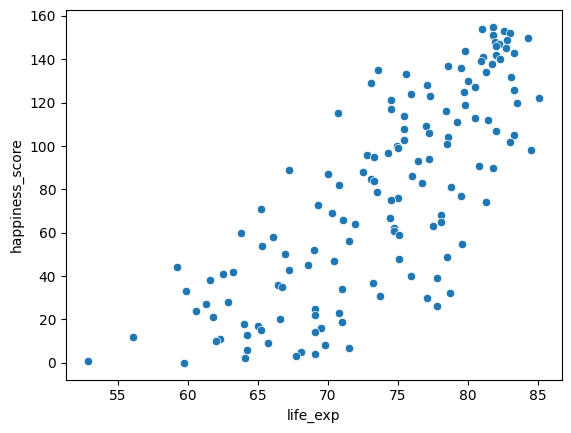

In [60]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)

# Show plot
plt.show()

An `lmplot`, provided by the seaborn library, combines a scatter plot with a linear regression line. It performs linear regression analysis on the given data and fits a line that best represents the relationship between the variables. In addition to displaying the data points.

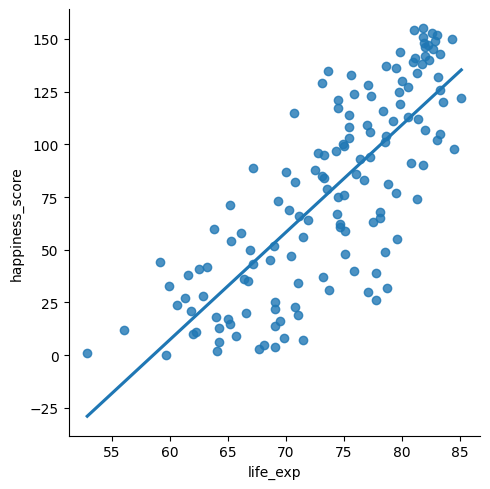

In [61]:
# 
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)

# Show plot
plt.show()

When `ci` is set to None, it means that no **confidence intervals** will be displayed in the plot. **Confidence intervals** provide an estimate of the uncertainty associated with the regression line and show the range within which the true regression line is likely to fall.

By setting ci to None, you are instructing lmplot not to include the **confidence intervals** in the plot, resulting in a simpler visualization that only shows the regression line and the scatter points.

In [62]:
# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)

0.7802249053272062


### **Correlation caveats**

- Correlation does not imply causation.
- Spurious correlations can arise due to coincidental or third-variable influences.
- Correlation assumes a linear relationship and may not capture non-linear  associations.
- Outliers can disproportionately impact correlation results.
- Sample size affects the reliability of correlation estimates.
- Establishing causality can be challenging in observational studies.
- Correlation coefficients can be influenced by restricted range of values.

### **What can't correlation measure?**

While the correlation coefficient is a convenient way to quantify the strength of a relationship between two variables, it's far from perfect. In this exercise, we'll explore one of the caveats of the correlation coefficient by examining the relationship between a **country's GDP per capita** (`gdp_per_cap`) and **happiness score**.

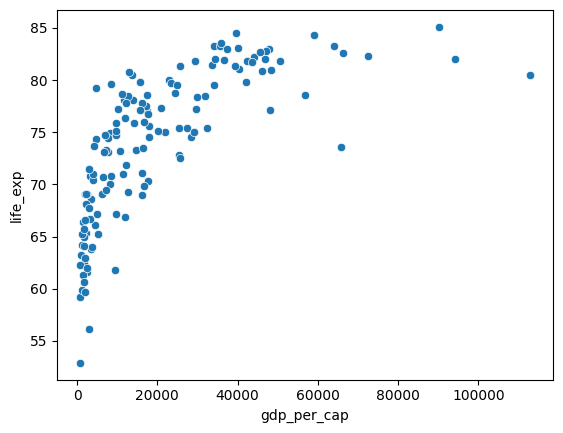

In [63]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Show plot
plt.show()

In [64]:
# Correlation between gdp_per_cap and life_exp
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

print(cor)

0.7019547642148012


**Question**

**The correlation between GDP per capita and life expectancy is 0.7. Why is correlation not the best way to measure the relationship between these two variables?**

**Possible Answers**

- Correlation measures how one variable affects another. ❌

- **Correlation only measures linear relationships.** ✔

- Correlation cannot properly measure relationships between numeric variables. ❌

### **Transforming variables**

When variables have skewed distributions, they often require a transformation in order to form a linear relationship with another variable so that correlation can be computed.

In this exercise, we'll perform a transformation yourself.

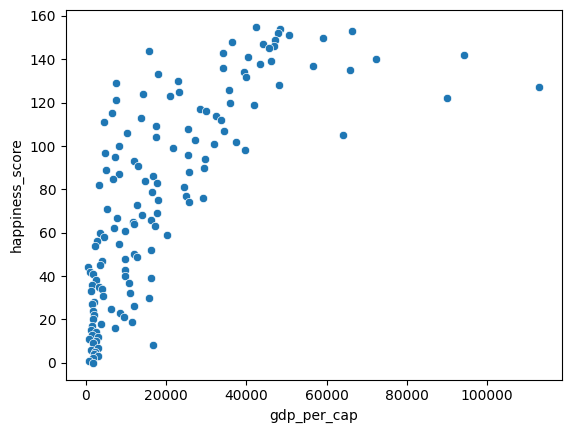

0.727973301222298


In [65]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x ='gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

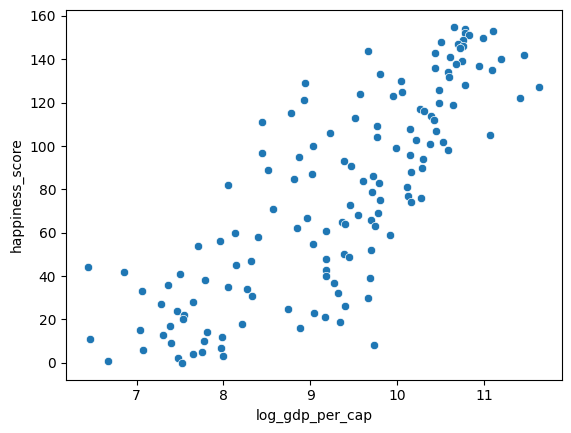

0.8043146004918288


In [66]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of log_gdp_per_cap and happiness_score
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data= world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

- The relationship between `GDP per capita` and `happiness` became more `linear` by applying a `log transformation`.

- **Log transformations are great to use on variables with a skewed distribution, such as GDP.**

<p align='center'>
  <a href="#"><img src='https://tymsai.netlify.app/resource/1.gif' height='10' width=100% alt="div"></a>
</p>

#### $\color{skyblue}{\textbf{Connect with me:}}$


[<img align="left" src="https://cdn4.iconfinder.com/data/icons/social-media-icons-the-circle-set/48/twitter_circle-512.png" width="32px"/>][twitter]
[<img align="left" src="https://cdn-icons-png.flaticon.com/512/145/145807.png" width="32px"/>][linkedin]
[<img align="left" src="https://cdn2.iconfinder.com/data/icons/whcompare-blue-green-web-hosting-1/425/cdn-512.png" width="32px"/>][Portfolio]

[twitter]: https://twitter.com/F4izy
[linkedin]: https://www.linkedin.com/in/mohd-faizy/
[Portfolio]: https://mohdfaizy.com/